# Processing of the results

First some imports

In [94]:
import os

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Processing and Data Visualization

In [104]:
sample = "both"
output_directory = Path(f"./results/both")
input_dir = Path(f".")
error_of_interest = "relRMSE"
input_csv_file_cg = input_dir.joinpath("results/churyumov-gerasimenko", f"total_results_churyumov-gerasimenko.csv")
input_csv_file_er = input_dir.joinpath("results/eros", f"total_results_eros.csv")
df_cg = pd.read_csv(input_csv_file_cg)
df_er = pd.read_csv(input_csv_file_er)

noise_replacement_cg = {
    "['']" : "No Noise",
    "['constant_bias', [0.000272, 0.0, 0.0]]": "Constant Bias",
    "['gaussian', 0.0, 0.146731]": "Additive Gaussian $\mu = 0 \; \sigma= 10^{-5} m/s^2$",
    "['gaussian', 0.0, 1.467314]": "Additive Gaussian $\mu = 0 \; \sigma= 10^{-4} m/s^2$",
    "['adaptive_gaussian_noise', 0.001]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.001$",
    "['adaptive_gaussian_noise', 0.01]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$",
    "['adaptive_gaussian_noise', 0.1]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$"
}

noise_replacement_er = {
    "['']" : "No Noise",
    "['constant_bias', [9.79917e-05, 0.0, 0.0]]": "Constant Bias",
    "['gaussian', 0.0, 0.009337]": "Additive Gaussian $\mu = 0 \; \sigma= 10^{-5} m/s^2$",
    "['gaussian', 0.0, 0.093371]": "Additive Gaussian $\mu = 0 \; \sigma= 10^{-4} m/s^2$",
    "['adaptive_gaussian_noise', 0.001]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.001$",
    "['adaptive_gaussian_noise', 0.01]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$",
    "['adaptive_gaussian_noise', 0.1]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$"
}

for key, replacement in noise_replacement_cg.items():
    df_cg["noise"].replace(key, replacement, inplace=True)

for key, replacement in noise_replacement_er.items():
    df_er["noise"].replace(key, replacement, inplace=True)


df_cg["sample"].replace("churyumov-gerasimenko", "Churyumov-Gerasimenko", inplace=True)
df_er["sample"].replace("eros", "Eros", inplace=True)

df_cg = df_cg[df_cg["noise"] != "['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]"]
df_cg = df_cg[df_cg["noise"] != "['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]"]

df_er = df_er[df_er["noise"] != "['combined', 0.0, 0.009337, [9.79917e-05, 0.0, 0.0]]"]
df_er = df_er[df_er["noise"] != "['combined', 0.0, 0.093371, [9.79917e-05, 0.0, 0.0]]"]

df = pd.concat([df_cg, df_er], ignore_index=True)
df_copy = df.copy()

sample_distance_replacement = {
    "[0. 1.]": "$(0, 1)$",
    "[1. 3.]": "$(1, 3)$",
    "[3. 5.]": "$(3, 5)$",
}
sns.set(font_scale=1.1)
df

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,resolution,loss,batch_size,...,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,validation_batch_size
0,Churyumov-Gerasimenko,None,results/pretrain-3,9,2500,2023,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001742,0.243009,0.319324,0.891220,0.387531,0.340218,0.376631,1.229114,0.456091,NaN
1,Churyumov-Gerasimenko,None,results/pretrain-3,4,2500,42,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001757,0.243016,0.319383,0.889810,0.387722,0.338965,0.375233,1.200275,0.447725,NaN
2,Churyumov-Gerasimenko,None,results/pretrain-3,8,2500,1999,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001754,0.243368,0.319846,0.890820,0.388085,0.341383,0.378013,1.246698,0.462277,NaN
3,Churyumov-Gerasimenko,None,results/pretrain-3,7,2500,433,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001743,0.242342,0.318495,0.888598,0.387430,0.339693,0.376133,1.234056,0.459495,NaN
4,Churyumov-Gerasimenko,None,results/pretrain-3,2,2500,9,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001739,0.243368,0.319820,0.893603,0.389279,0.339952,0.376413,1.226245,0.456085,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,Eros,None,results/short-eros-0010,65,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.004856,1.324031,1.054829,4.415632,1.130994,1.665202,1.113562,5.242668,1.150094,100.0
2520,Eros,None,results/short-eros-0010,66,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.000238,1.166889,0.933513,4.195047,1.073782,1.366076,0.934823,4.353993,0.994397,100.0
2521,Eros,None,results/short-eros-0010,67,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.000188,1.219632,0.967219,4.336292,1.100419,1.449130,0.988607,4.522977,1.026350,100.0
2522,Eros,None,results/short-eros-0010,68,2500,2023,polyhedral,100%,normalized_L1_loss,1000,...,0.000194,1.188686,0.946627,4.238924,1.079437,1.435071,0.978724,4.502932,1.020725,100.0


In [127]:
df = df_copy.copy()
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
ALTITUDES_np = np.array(ALTITUDES)
ALTITUDES_np = ALTITUDES_np[::2]
str_altitudes = [str(x) for x in ALTITUDES]
ALTITUDES_metric_cg = unit_conversion.convert_altitude("churyumov-gerasimenko", ALTITUDES_np, unit='m')
ALTITUDES_metric_cg = ["{:5.1f}".format(x) for x in ALTITUDES_metric_cg]
ALTITUDES_metric_er = unit_conversion.convert_altitude("eros", ALTITUDES_np, unit='m')
ALTITUDES_metric_er = ["{:5.1f}".format(x) for x in ALTITUDES_metric_er]
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df = df[
    (df["iterations"] == 10000)
    & (df["pretrained_model"] == "None")
    & (df["resolution"] == "100%")
    & (df["noise"] == "No Noise")
    & (df["sample_domain"] == "[0.0, 1.0]")
    & (df["integration_points"] == 300000)
    ]
interesting_columns = ["sample", "pretrained_model", "seed", "ground_truth", "resolution", "sample_domain", "noise", "iterations", "integration_points"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]

unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df.drop(columns=["pretrained_model", "seed", "resolution", "sample_domain", "noise", "integration_points", "iterations"], inplace=True)

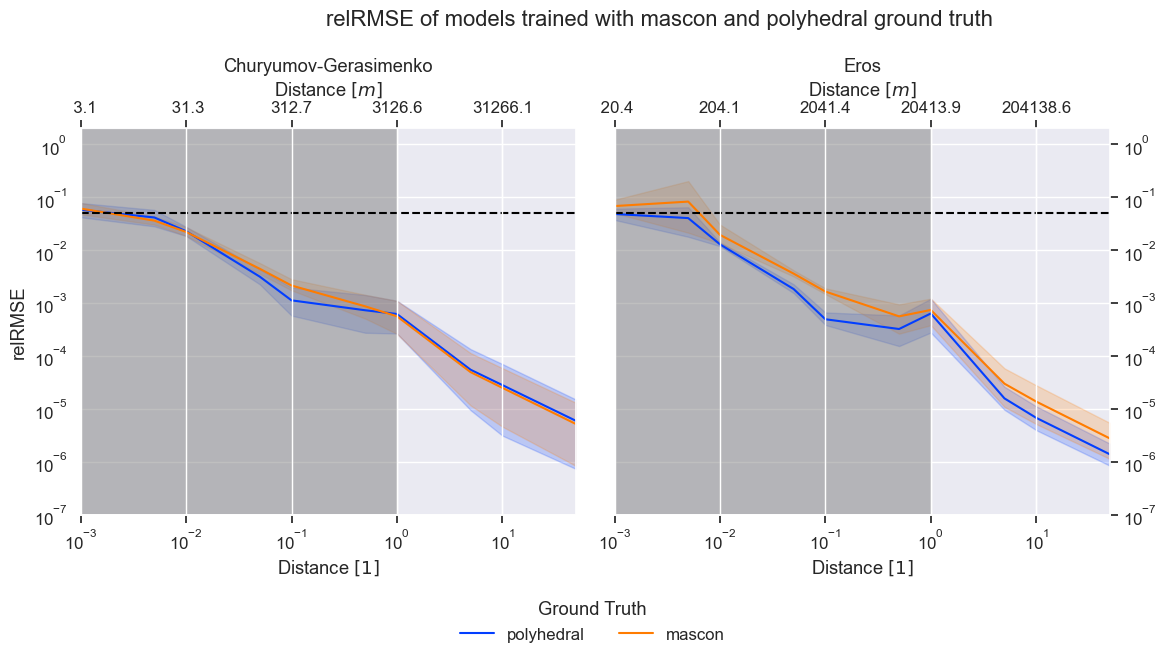

In [128]:
dfm = df.melt(["sample", "ground_truth"], str_altitudes, var_name="Distance", value_name=error_of_interest)
dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm.rename(columns={"ground_truth": "Ground Truth"}, inplace=True)

g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest,
    hue="Ground Truth", palette="bright", hue_order=["polyhedral", "mascon"],
    col="sample",
    height=6, aspect=1.0,
)
g.set(
    xlim=(0.001, 50.0), xscale='log', yscale='log', ylim=(1e-7, 2.0)
)
sns.move_legend(g, "lower center", frameon=False, bbox_to_anchor=(.45, -0.1), ncol=2)

g.set_titles("{col_name}")

g.fig.suptitle("relRMSE of models trained with mascon and polyhedral ground truth")



g.map(plt.axhline, y=0.05, ls='--', c='black', label="5%")

for ax in g.axes[0,:]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

for ax in g.axes[:,1]:
    ax.tick_params(right=True, labelright=True, labelrotation=0)


ax2 = g.axes[0,0].twiny()
ax2.set_xlim((0.001, 50.0))
ax2.set_xscale('log')
ax2.set_xticks(ALTITUDES_np)
ax2.set_xticklabels(ALTITUDES_metric_cg)
ax2.tick_params(top=True, labeltop=True, labelrotation=0)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel("Distance $[m]$")
ax2.minorticks_off()
g.axes[0,0].set_xlabel("Distance $[1]$")
g.axes[0,0].minorticks_off()

ax2 = g.axes[0,1].twiny()
ax2.set_xlim((0.001, 50.0))
ax2.set_xscale('log')
ax2.set_xticks(ALTITUDES_np)
ax2.set_xticklabels(ALTITUDES_metric_er)
ax2.tick_params(top=True, labeltop=True, labelrotation=0)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel("Distance $[m]$")
ax2.minorticks_off()
g.axes[0,1].set_xlabel("Distance $[1]$")
g.axes[0,1].minorticks_off()



g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_{error_of_interest}_mascon_polyhedral.png")
g.savefig(save_path, dpi=300)

In [129]:
df = df_copy.copy()
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
str_altitudes = [str(x) for x in ALTITUDES]
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df = df[(df["ground_truth"] == "polyhedral") & (df["resolution"] == "100%") & (df["noise"] == "No Noise") & (df["sample_domain"] == "[3.0, 5.0]") & (df["integration_points"] == 300000) & (df["iterations"] != 1000) & (df["iterations"] != 10000)]

interesting_columns = ["sample", "pretrained_model", "seed", "ground_truth", "resolution", "sample_domain", "noise", "iterations", "integration_points"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]

unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df.drop(columns=["seed", "resolution", "sample_domain", "noise", "integration_points"], inplace=True)

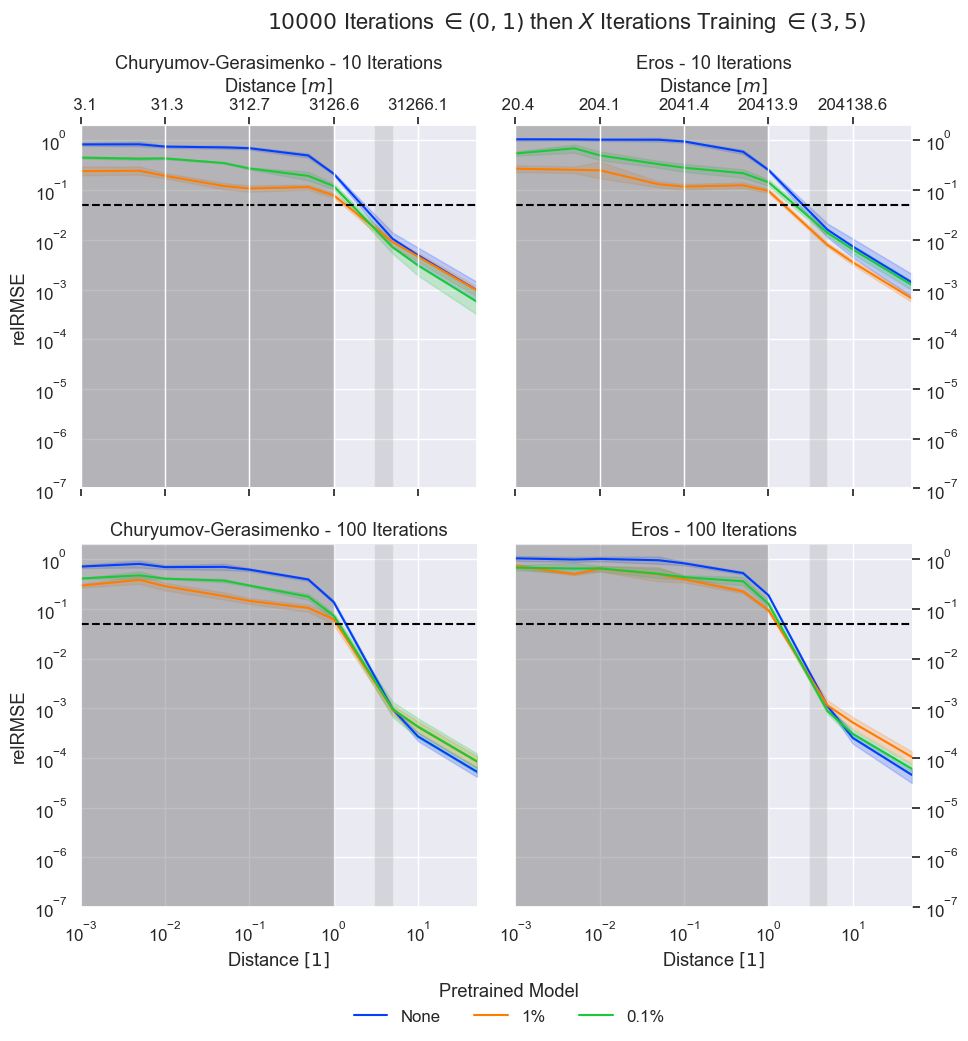

In [130]:
dfm = df.melt(["sample", "iterations", "pretrained_model"], str_altitudes, var_name="Distance", value_name=error_of_interest)
dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))

dfm.rename(columns={"iterations": "Fine-Tuning Iterations", "pretrained_model": "Pretrained Model"}, inplace=True)

g = sns.relplot(
    data=dfm, kind="line",
    row="Fine-Tuning Iterations",
    x="Distance", y=error_of_interest,
    hue="Pretrained Model", palette="bright", hue_order=["None", "1%", "0.1%"],
    col="sample"
)
g.set(
    xlim=(0.001, 50.0), xscale='log', yscale='log', ylim=(1e-7, 2.0)
)

sns.move_legend(g, "lower center", frameon=False, bbox_to_anchor=(.45, -0.05), ncol=3)

g.set_titles("{col_name} - {row_name} Iterations")
g.fig.suptitle("$10 000$ Iterations $\in (0,1)$ then $X$ Iterations Training $\in (3,5)$")

g.map(plt.axhline, y=0.05, ls='--', c='black', label="5%")

for ax in g.axes[0,:]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.2)
for ax in g.axes[1,:]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.2)

for ax in g.axes[:,1]:
    ax.tick_params(right=True, labelright=True, labelrotation=0)


ax2 = g.axes[0,0].twiny()
ax2.set_xlim((0.001, 50.0))
ax2.set_xscale('log')
ax2.set_xticks(ALTITUDES_np)
ax2.set_xticklabels(ALTITUDES_metric_cg)
ax2.tick_params(top=True, labeltop=True, labelrotation=0)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel("Distance $[m]$")
ax2.minorticks_off()
g.axes[0,0].minorticks_off()
g.axes[1,0].set_xlabel("Distance $[1]$")

ax2 = g.axes[0,1].twiny()
ax2.set_xlim((0.001, 50.0))
ax2.set_xscale('log')
ax2.set_xticks(ALTITUDES_np)
ax2.set_xticklabels(ALTITUDES_metric_er)
ax2.tick_params(top=True, labeltop=True, labelrotation=0)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel("Distance $[m]$")
ax2.minorticks_off()
g.axes[0,1].minorticks_off()
g.axes[1,1].set_xlabel("Distance $[1]$")

g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_{error_of_interest}_pretrain_iterations.png")
g.savefig(save_path, dpi=300)

In [141]:
df = df_copy.copy()
ALTITUDES = ast.literal_eval(df.at[0, "validation_sampling_altitudes"])
str_altitudes = [str(x) for x in ALTITUDES]
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df = df[(df["iterations"] == 10000) & (df["pretrained_model"] == "None") & (df["resolution"] == "100%") & (df["integration_points"] == 300000) & (df["ground_truth"] == "polyhedral")]

interesting_columns = ["sample", "pretrained_model", "seed", "ground_truth", "resolution", "sample_domain", "noise", "iterations", "integration_points"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]

unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df.drop(columns=["seed", "resolution", "ground_truth", "integration_points", "iterations"], inplace=True)

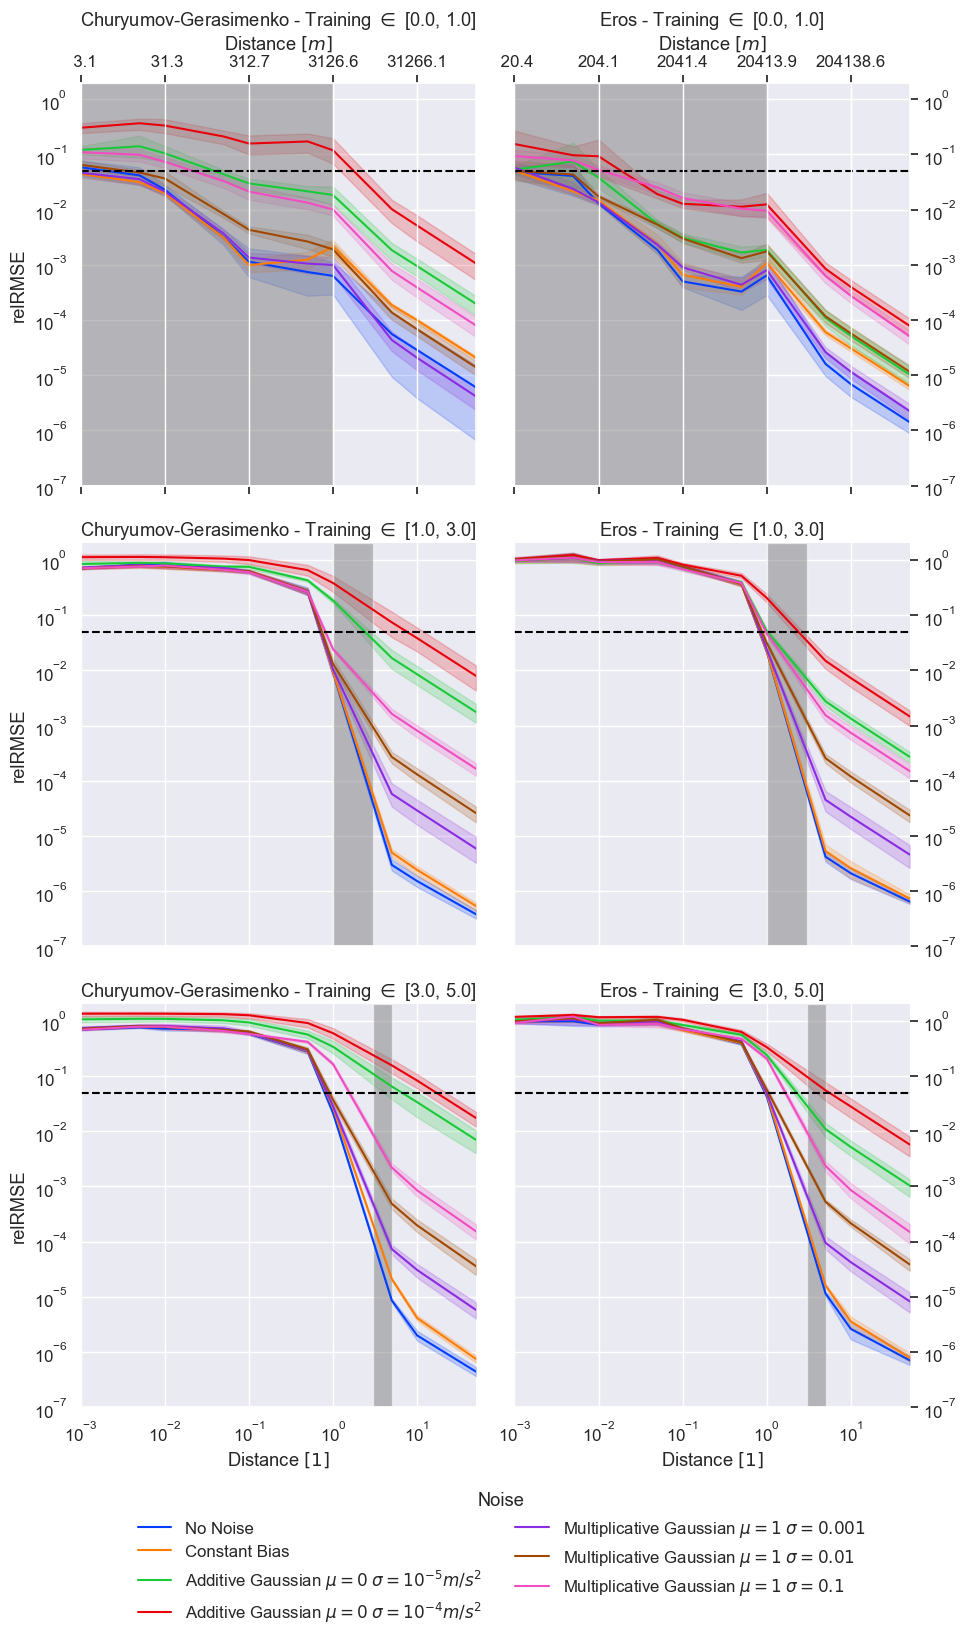

In [142]:
dfm = df.melt(["sample", "noise", "sample_domain"], str_altitudes, var_name="Distance", value_name=error_of_interest)
dfm["sample_domain"] = dfm["sample_domain"].apply(lambda x: str(x))
dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))

dfm.rename(columns={"sample_domain": "Sample Domain", "noise": "Noise"}, inplace=True)

g = sns.relplot(
    data=dfm, kind="line",
    row="Sample Domain", hue_order=noise_replacement_cg.values(),
    x="Distance", y=error_of_interest,
    hue="Noise", palette="bright",
    col="sample"
)
sns.move_legend(g, "lower center", frameon=False, bbox_to_anchor=(.375, -0.1), ncol=2)
g.set(
    xlim=(0.001, 50.0), xscale='log', yscale='log', ylim=(1e-7, 2.0)
)

g.set_titles("{col_name} - Training $\in$ {row_name}")

g.map(plt.axhline, y=0.05, ls='--', c='black', label="5%")

g.axes[0, 0].axvspan(0, 1.0, facecolor='gray', alpha=0.5)
g.axes[0, 1].axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.axes[1, 0].axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
g.axes[1, 1].axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)


g.axes[2, 0].axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)
g.axes[2, 1].axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)

for ax in g.axes[:,1]:
    ax.tick_params(right=True, labelright=True, labelrotation=0)


ax2 = g.axes[0,0].twiny()
ax2.set_xlim((0.001, 50.0))
ax2.set_xscale('log')
ax2.set_xticks(ALTITUDES_np)
ax2.set_xticklabels(ALTITUDES_metric_cg)
ax2.tick_params(top=True, labeltop=True, labelrotation=0)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel("Distance $[m]$")
ax2.minorticks_off()
g.axes[0,0].minorticks_off()
g.axes[2,0].set_xlabel("Distance $[1]$")

ax2 = g.axes[0,1].twiny()
ax2.set_xlim((0.001, 50.0))
ax2.set_xscale('log')
ax2.set_xticks(ALTITUDES_np)
ax2.set_xticklabels(ALTITUDES_metric_er)
ax2.tick_params(top=True, labeltop=True, labelrotation=0)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel("Distance $[m]$")
ax2.minorticks_off()
g.axes[0,1].minorticks_off()
g.axes[2,1].set_xlabel("Distance $[1]$")

g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_{error_of_interest}_noise.png")
g.savefig(save_path, dpi=300)

In [108]:
dfm

,Noise,Sample Domain,Distance,relRMSE
0,Constant Bias $c = 0.000272$,"$(0, 1)$",0.001,0.036996
1,Additive Gaussian $\mu = 0 \; \sigma= 0.14$,"$(1, 3)$",0.001,0.842197
2,Additive Gaussian $\mu = 0 \; \sigma= 1.47$,"$(3, 5)$",0.001,1.066178
3,Additive Gaussian $\mu = 0 \; \sigma= 1.47$,"$(1, 3)$",0.001,1.199893
4,Constant Bias $c = 0.000272$,"$(1, 3)$",0.001,0.665508
...,...,...,...,...
2095,Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$,"$(1, 3)$",50.000,0.000017
2096,Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$,"$(3, 5)$",50.000,0.000028
2097,Multiplicative Gaussian $\mu = 1 \; \sigma= 0....,"$(0, 1)$",50.000,0.000004
2098,Multiplicative Gaussian $\mu = 1 \; \sigma= 0....,"$(1, 3)$",50.000,0.000006
